In [28]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import preprocessing

# import file from previous week
%run week13-Preprocessing-Data-for-scikit-learn.ipynb

#count amount of poisonous(1) and edible(0)
print("KEY: poisonous = 1, edible = 0")
print(subset_columns['edible/poisonous'].value_counts())

KEY: poisonous = 1, edible = 0
0    4208
1    3916
Name: edible/poisonous, dtype: int64


In [2]:
#Three columns choosen
subset_columns

,edible/poisonous,odor,stalk-root
0,1,p,e
1,0,a,c
2,0,l,c
3,1,p,e
4,0,n,e
5,0,a,c
6,0,a,c
7,0,l,c
8,1,p,e
9,0,a,c


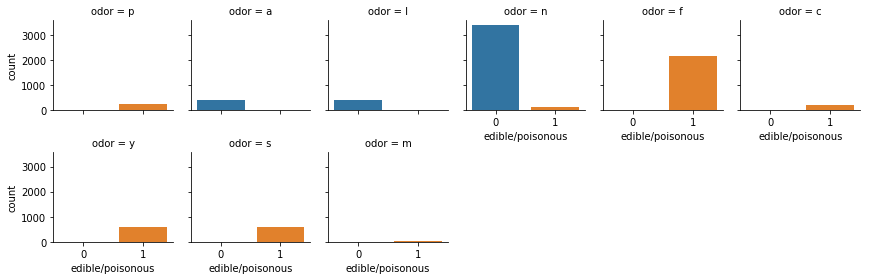

In [10]:
# comparison of odor and edible/poisonous
odor_comparison = sns.factorplot("edible/poisonous", col="odor", data=subset_columns,
                    kind="count", size=2, aspect=1, col_wrap=6)

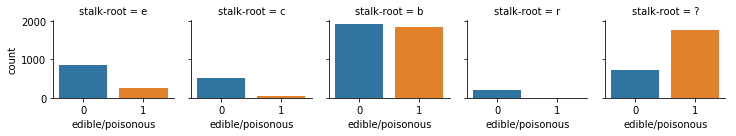

In [11]:
# comparison of stalk root and edible/poisonous

stalk_root_comparison = sns.factorplot("edible/poisonous", col="stalk-root", data=subset_columns,
                    kind="count", size=2, aspect=1, col_wrap=6)

In [34]:
# X represents each column
X = pd.DataFrame(df, columns=df.columns[1:len(df.columns)], index=df.index)
# Y represents the value of each column
Y = df['edible/poisonous']

# encode data as numbers
encoding_data = preprocessing.LabelEncoder()
encoding_data.fit(Y)


y = encoding_data.transform(Y)
x = pd.DataFrame(X,columns=[X.columns[0]])

#encode each column value and add it to x_train
for column in X.columns:
    encoding_data.fit(X[column])
    x[column] = encoding_data.transform(X[column])
    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

skgnb = GaussianNB()
skgnb.fit(x_train,y_train)
train_predict = skgnb.predict(x_train)

print("Training Data Accuracy:",metrics.accuracy_score(y_train, train_predict))

#predicting the test values
test_predict = skgnb.predict(x_test)
print("Testing Data Accuracy:",metrics.accuracy_score(y_test, test_predict))

Training Data Accuracy: 0.9143854492008083
Testing Data Accuracy: 0.9119731443491235


In [36]:
print("Confusion Matrix:")
skcm = metrics.confusion_matrix(y_test,test_predict)
skcm = pd.DataFrame(skcm, columns=['predicted-edible','predicted-poisonous'])
skcm['actual'] = ['edible','poisonous']
skcm = skcm.set_index('actual')

# describe the performance of a classification model 
print(skcm)

print("Accuracy: ", skgnb.score(x_test,y_test))

Confusion Matrix:
           predicted-edible  predicted-poisonous
actual                                          
edible                 1261                  143
poisonous                93                 1184
Accuracy:  0.9119731443491235
